In [173]:
#required libraries:
#matplotlib, seaborn, plotly, kmodes, numpy, pandas, 

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as poi
import seaborn as sns

In [117]:
df=pd.read_csv(r"C:\Users\risha\Downloads\Datasets-20240524T175328Z-001\Datasets\behavioural_segment_data.csv")

In [118]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [119]:
df.shape

(99, 8)

In [120]:
df.duplicated().sum()

0

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [122]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [123]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [124]:
# Replacing Yes and No to 1 and 0 for Personal Loan column

#df['Personal loan'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

In [125]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'Car_Price'},inplace=True)

In [126]:
df.columns=df.columns.str.replace(' ','_')

In [127]:
df.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Car_Loan,Total_Salary,Car_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


### Univariate Analysis

In [128]:
df['Age'].value_counts(normalize=True)

Age
36    0.131313
35    0.101010
31    0.080808
41    0.070707
34    0.070707
27    0.060606
37    0.060606
42    0.050505
30    0.050505
39    0.040404
44    0.040404
29    0.040404
51    0.030303
49    0.030303
28    0.030303
43    0.020202
33    0.020202
32    0.020202
45    0.020202
46    0.010101
50    0.010101
26    0.010101
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Age'}, ylabel='Density'>

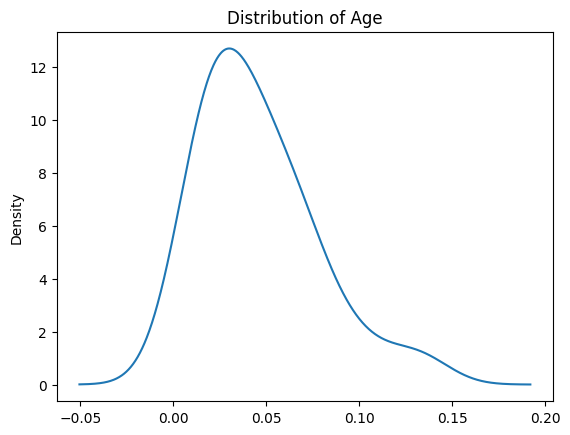

In [180]:
df['Age'].value_counts(normalize=True).plot(kind='kde',title= 'Distribution of Age')

<Axes: title={'center': 'Distibution of age'}, xlabel='No of Samples'>

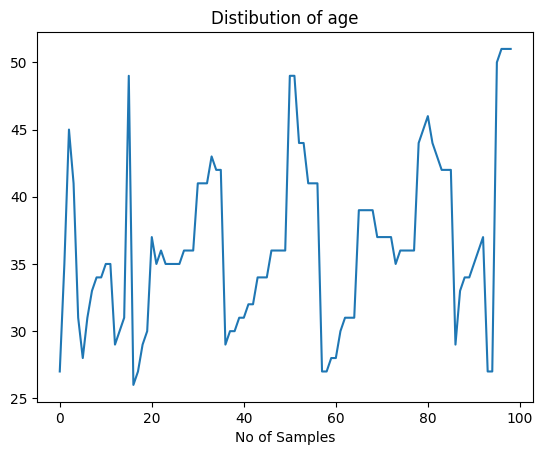

In [181]:
df['Age'].plot(xlabel='No of Samples',y='Age',title='Distibution of age')

<Axes: title={'center': 'Distribution of Salary'}, ylabel='Density'>

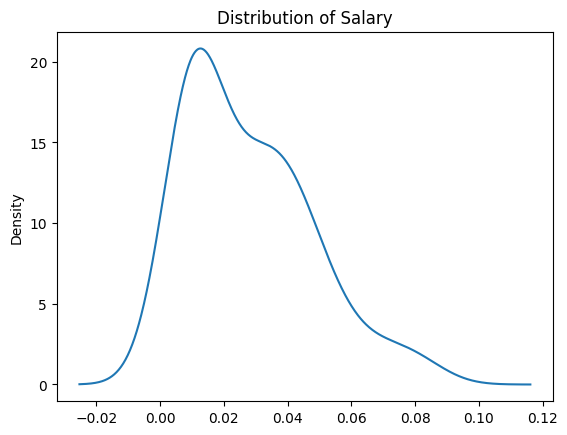

In [182]:
df['Total_Salary'].value_counts(normalize=True).plot(kind='kde',title= 'Distribution of Salary')

<Axes: title={'center': 'Distribution of Age'}, ylabel='Density'>

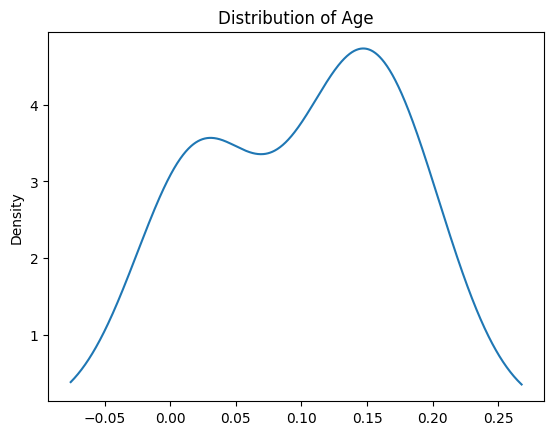

In [183]:
df['Car_Price'].value_counts(normalize=True).plot(kind='kde',title= 'Distribution of Age')

In [184]:
df['Marrital_Status'].value_counts(normalize=True)

Marrital_Status
Married    0.848485
Single     0.151515
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Marrital Status'}, ylabel='proportion'>

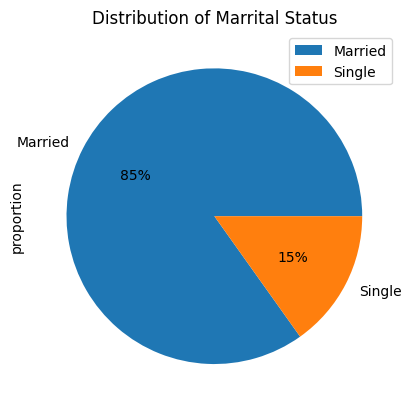

In [195]:
df['Marrital_Status'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',legend=True,title='Distribution of Marrital Status')

In [196]:
df['Education'].value_counts(normalize=True)

Education
Post Graduate    0.565657
Graduate         0.434343
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Education'}, ylabel='proportion'>

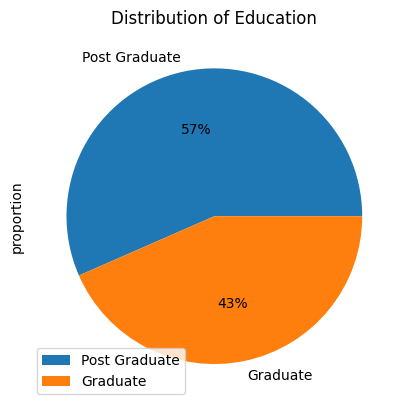

In [197]:
df['Education'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',legend=True,title='Distribution of Education')

In [198]:
df['No_of_Dependents'].value_counts(normalize=True)

No_of_Dependents
3    0.343434
2    0.292929
0    0.222222
4    0.141414
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of No_of_Dependents'}, ylabel='proportion'>

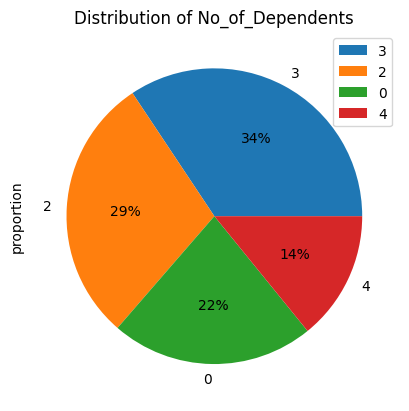

In [199]:
df['No_of_Dependents'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',legend=True,title='Distribution of No_of_Dependents')

In [200]:
df['Car_Loan'].value_counts(normalize=True)

Car_Loan
No     0.676768
Yes    0.323232
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Personal Loan'}, ylabel='proportion'>

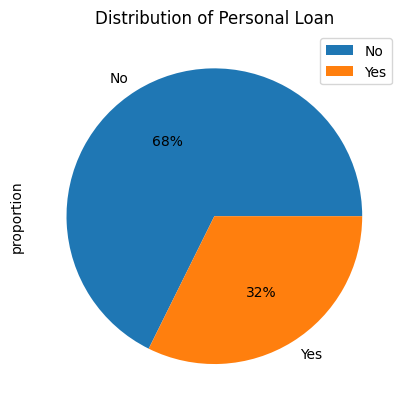

In [201]:
df['Car_Loan'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',legend=True,title='Distribution of Personal Loan')

In [202]:
df['Profession'].value_counts(normalize=True)

Profession
Salaried    0.646465
Business    0.353535
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Profession'}, ylabel='proportion'>

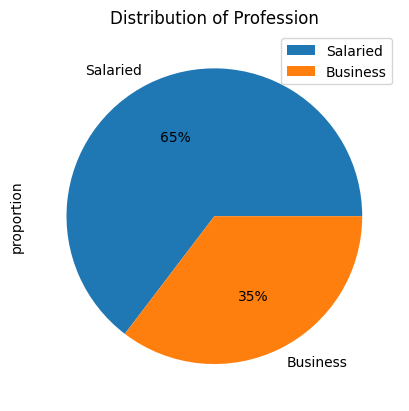

In [203]:
df['Profession'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',legend=True,title='Distribution of Profession')

### Bivariate Analysis

In [204]:
df.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Car_Loan,Total_Salary,Car_Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,0
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,0
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,0


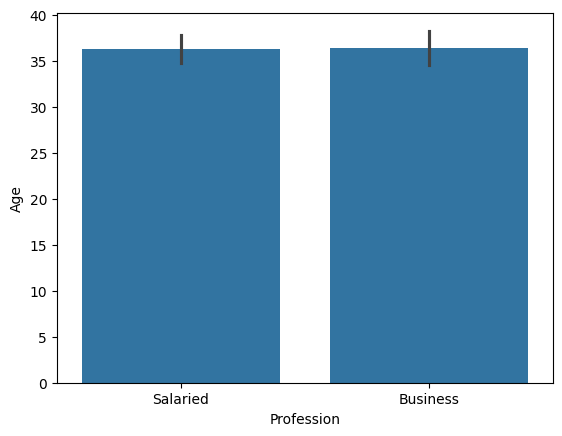

In [205]:
sns.barplot(x='Profession',y='Age',data=df)
plt.show()

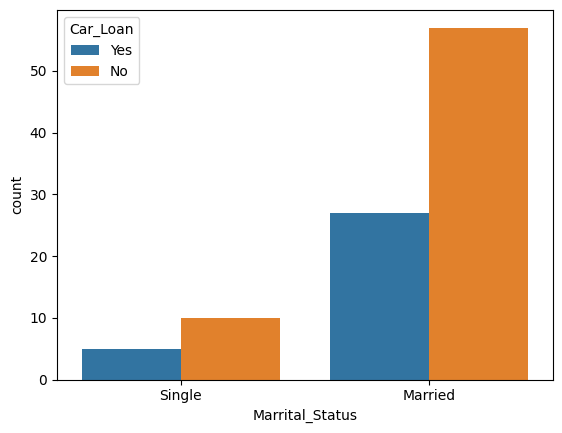

In [206]:
sns.countplot(x='Marrital_Status',hue='Car_Loan',data=df)
plt.show()

Percentage of Married couple opting for car loan is higher compared to single

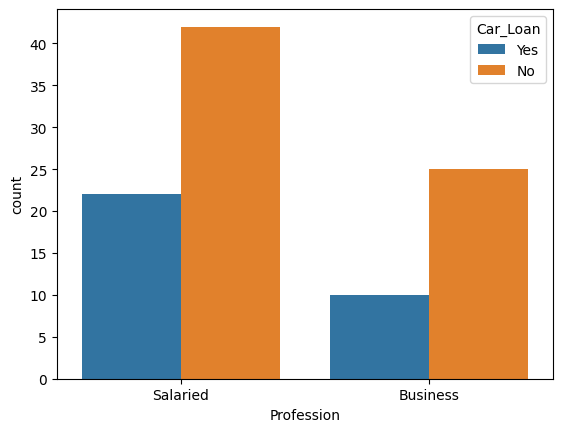

In [146]:
sns.countplot(x='Profession',hue='Car_Loan',data=df)
plt.show()

Percentage of Salaried people opting for car loan is higher as compared to Business men.

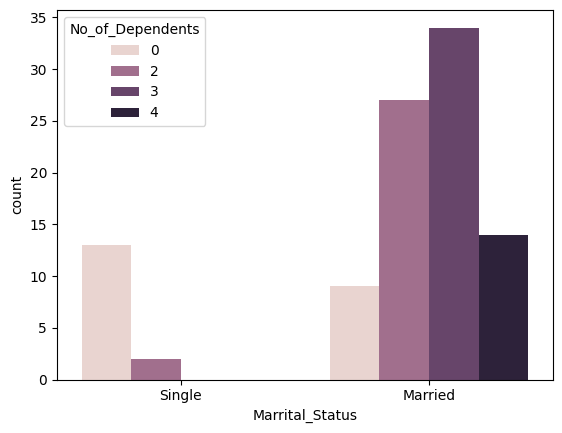

In [147]:
sns.countplot(x='Marrital_Status',hue='No_of_Dependents',data=df)
plt.show()

The number of dependents can vary depending on marital status, as married individuals may have a spouse and children who rely on them for support.

<Axes: xlabel='Total_Salary', ylabel='Car_Price'>

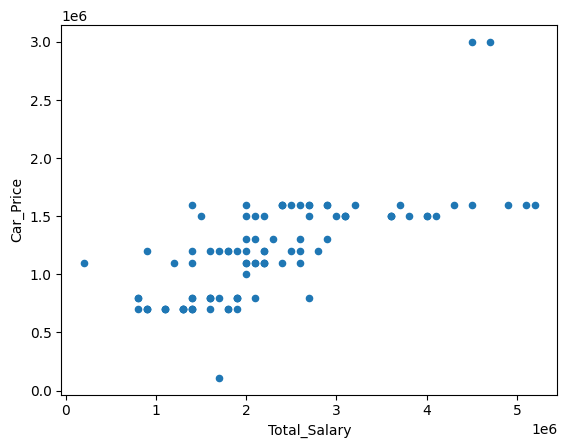

In [217]:
df.plot(kind='scatter',x='Total_Salary',y='Car_Price')

### Multivariate Analysis

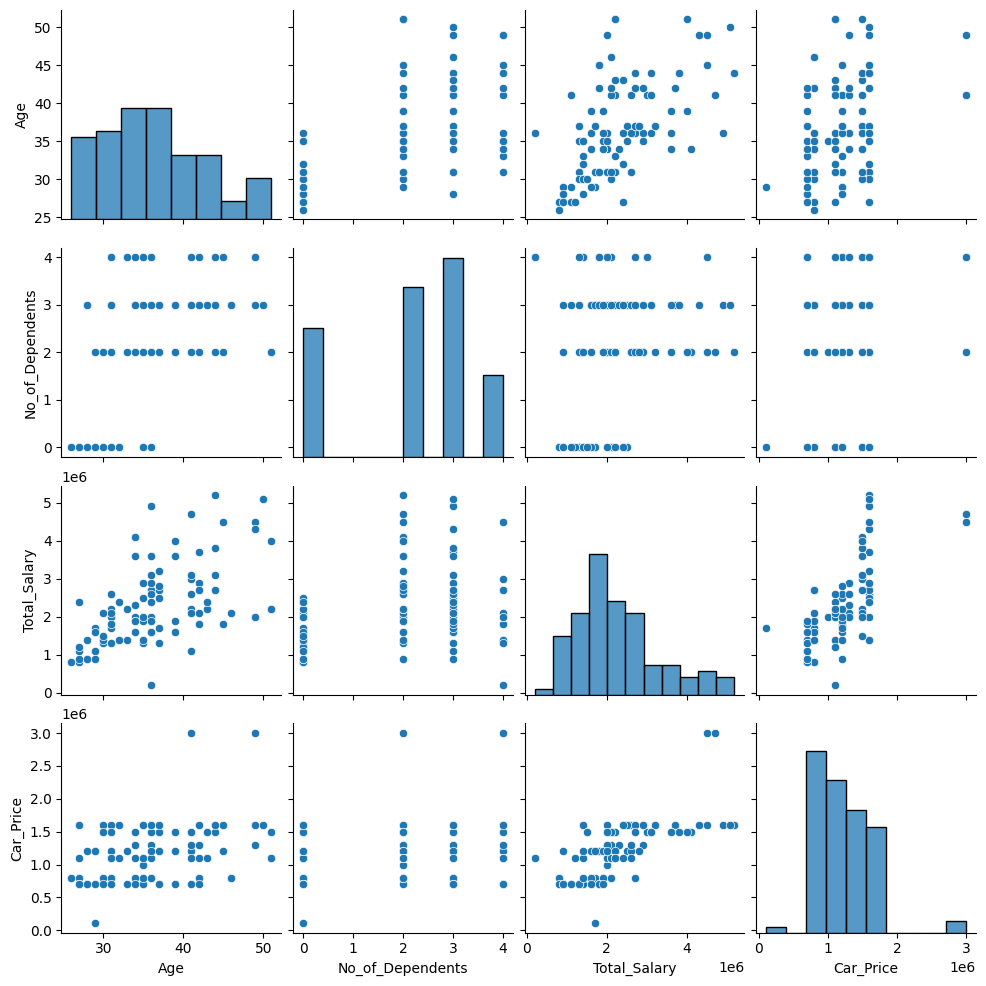

In [149]:
sns.pairplot(df)

In [218]:
df_corr = df_numeric.corr()
print(df_corr)

                       Age  No_of_Dependents  Total_Salary  Car_Price
Age               1.000000          0.543675      0.587082   0.376661
No_of_Dependents  0.543675          1.000000      0.234379   0.088822
Total_Salary      0.587082          0.234379      1.000000   0.717442
Car_Price         0.376661          0.088822      0.717442   1.000000


<Axes: >

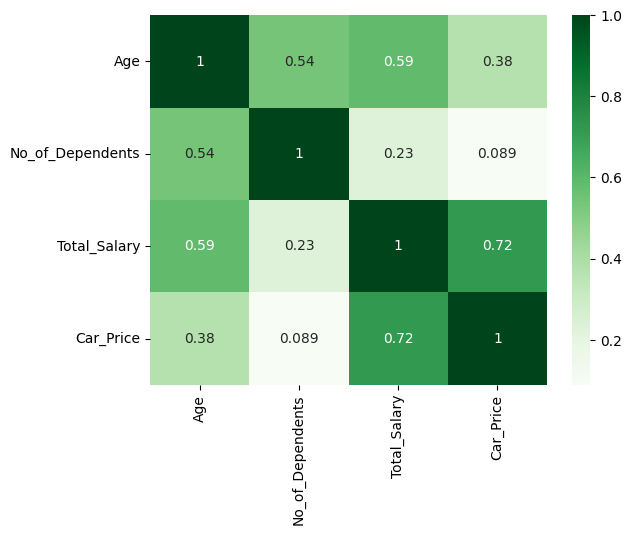

In [222]:
sns.heatmap(df_corr,cmap='Greens',annot=True)

### K-Means Clustering

In [223]:
df.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Car_Loan,Total_Salary,Car_Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,0
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,0
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,0


In [153]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes 

In [226]:
cluster_features = list(df.columns)
cluster_data = df[cluster_features].values


In [229]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

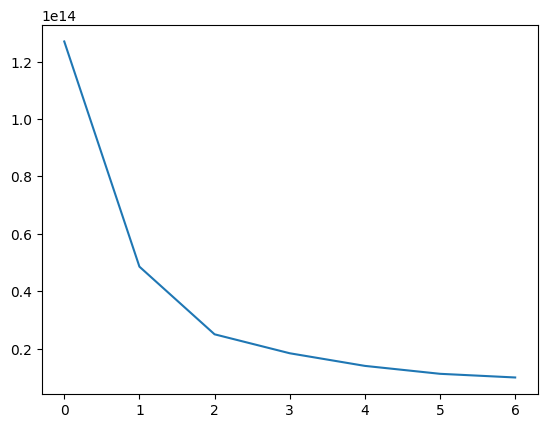

In [230]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)


In [231]:
cost

[126979652859256.02,
 48631724752583.12,
 25087748520247.85,
 18491804782787.71,
 14099249227193.297,
 11342829859093.973,
 10065767134581.072]

In [232]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 35, ncost: 60593961677509.37
Run: 1, iteration: 2/20, moves: 20, ncost: 50447068906713.6
Run: 1, iteration: 3/20, moves: 3, ncost: 50057036336077.336
Run: 1, iteration: 4/20, moves: 1, ncost: 50020386769268.03
Run: 1, iteration: 5/20, moves: 0, ncost: 50020386769268.03
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 19, ncost: 51421674166425.73
Run: 2, iteration: 2/20, moves: 6, ncost: 50057036336077.336
Run: 2, iteration: 3/20, moves: 1, ncost: 50020386769268.03
Run: 2, iteration: 4/20, moves: 0, ncost: 50020386769268.03
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 18, ncost: 51421674166425.73
Run: 3, iteration: 2/20, moves: 6, ncost: 50057036336077.336
Run: 3, iteration:

In [233]:
# Appending the cluster data

df['Cluster'] = clusters


In [234]:
# Average cost of the EV
df.Car_Price.mean()


1194040.4040404041

In [235]:
# Average cost of a car in segment 1 
df.Car_Price[df.Cluster==0].mean()


1632142.857142857

In [236]:
df['Car_Price'][df.Cluster==1].max()

1600000

In [237]:
# Average cost of a car in segment 1 
df.Car_Price[df.Cluster==1].mean()

1021267.6056338028

In [238]:
df['Cluster'].value_counts(normalize=True) * 100

Cluster
1    71.717172
0    28.282828
Name: proportion, dtype: float64

In [239]:
# Segregrating each cluster

Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]


In [240]:
df['Cluster'].value_counts()

Cluster
1    71
0    28
Name: count, dtype: int64

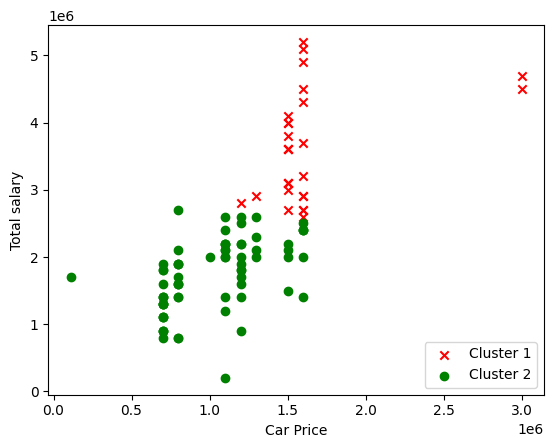

In [241]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],color='green', marker = 'o', label = 'Cluster 2')
plt.legend(loc="lower right")

plt.xlabel('Car Price')
plt.ylabel('Total salary')
plt.show()

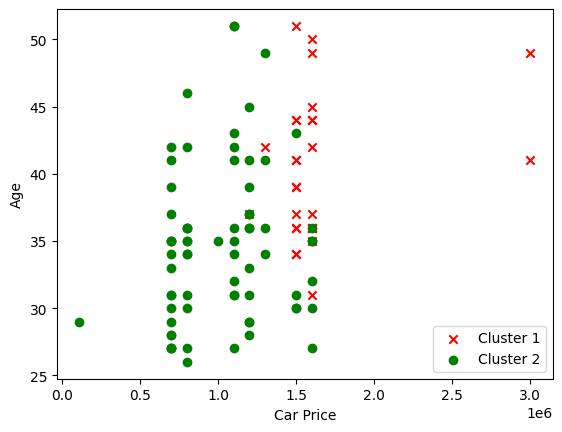

In [242]:
plt.scatter(Cluster_0.Car_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "lower right")

plt.xlabel('Car Price')
plt.ylabel('Age')
plt.show()

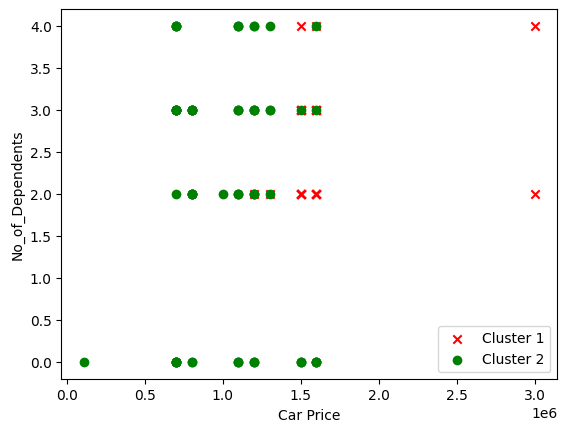

In [245]:
plt.scatter(Cluster_0.Car_Price, Cluster_0['No_of_Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Car_Price, Cluster_1['No_of_Dependents'],color='green', label = 'Cluster 2')
plt.legend(loc = "lower right")

plt.xlabel('Car Price')
plt.ylabel('No_of_Dependents')
plt.show()

In [246]:
from mpl_toolkits.mplot3d import Axes3D

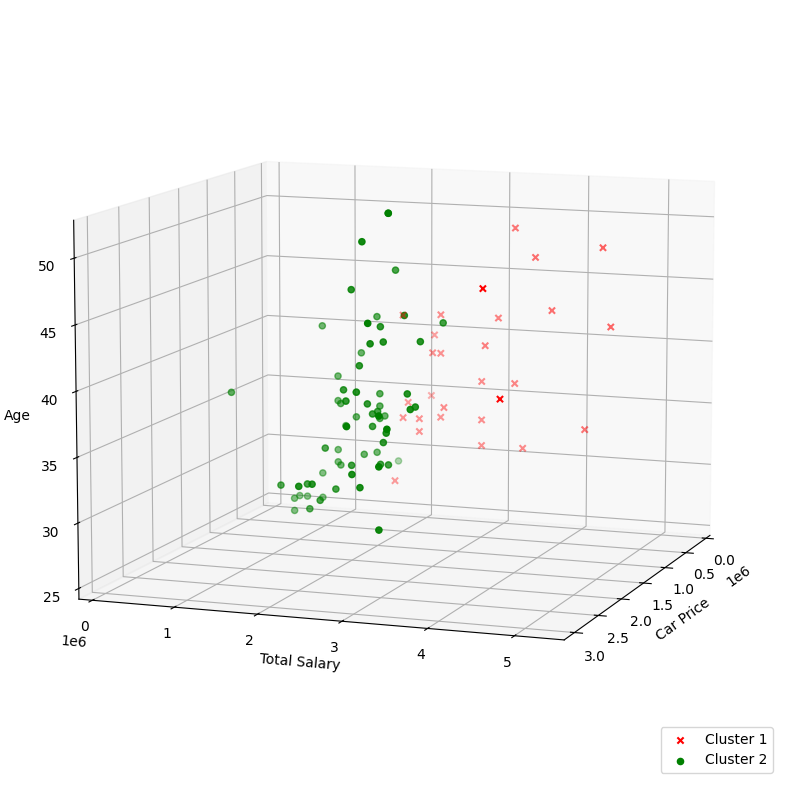

In [253]:
# plotting influence of age 

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'lower right')

ax.view_init(10, 20)

plt.xlabel("Car Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


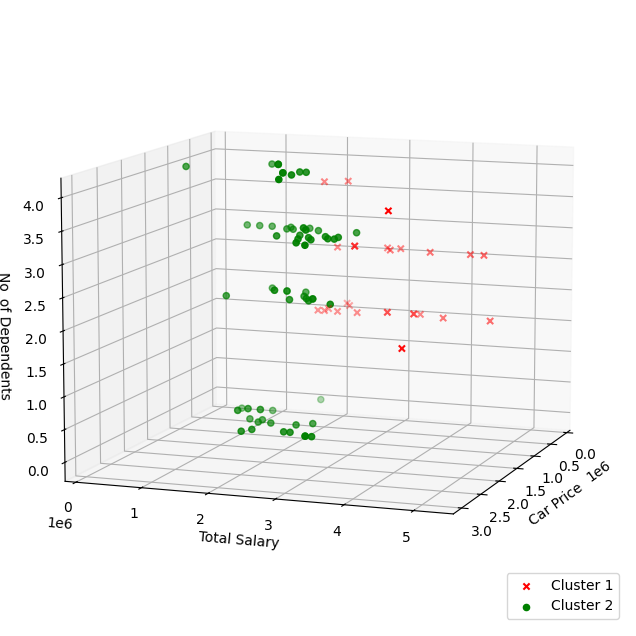

In [254]:
# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Car_Price, Cluster_0['Total_Salary'], Cluster_0['No_of_Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Car_Price, Cluster_1['Total_Salary'],Cluster_1['No_of_Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'lower right')

ax.view_init(10, 20)

plt.xlabel("Car Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No_of Dependents')
plt.show()
